In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [97]:
base = pd.read_csv('base_segundo_encontro.csv', encoding='latin-1', sep=';')
base

tempo_conversa_min  risadas  pontos_comuns  nivel_timidez  \
0                   112       16              6              0   
1                   102       13              2             10   
2                    24        8              2              3   
3                   116        7              4              0   
4                    81        1              2              5   
..                  ...      ...            ...            ...   
995                 129       19              6              0   
996                  68       17              5              6   
997                 137        5              3              7   
998                 123       10              1             10   
999                 124        1              8              7   

     mensagens_antes  iniciativa_conversa local_encontro momento_da_vida  \
0                 45                    8    Restaurante      Estressado   
1                 41                    6            Bar         Estável   
2                 16                    9           Café         Estável   
3                  8                    4            Bar      Estressado   
4                  5                    7         Parque         Estável   
..               ...                  ...            ...             ...   
995               25                    8            Bar         Estável   
996               12                    3    Restaurante         Estável   
997                7                    7         Parque         Cansado   
998               27                    8            Bar      Estressado   
999               29                    8           Café         Estável   

    segundo_encontro  
0                Sim  
1                Sim  
2                Sim  
3                Sim  
4                Não  
..               ...  
995              Sim  
996              Sim  
997              Sim  
998              Não  
999              Sim  

[1000 rows x 9 columns]

In [98]:
base.isnull().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

<Axes: xlabel='segundo_encontro', ylabel='count'>

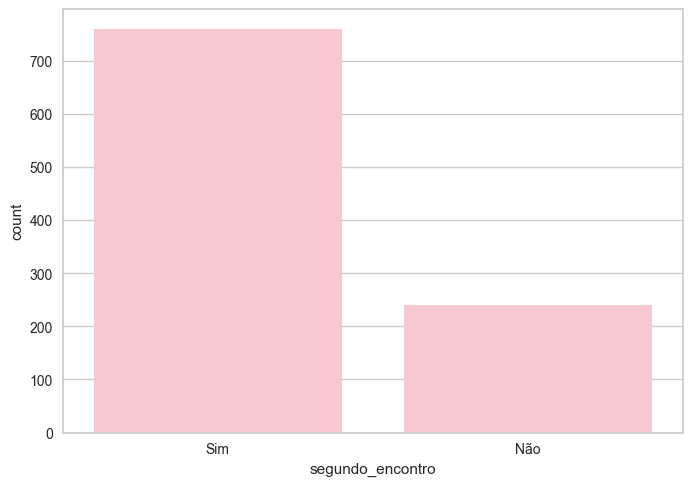

In [99]:
sns.countplot(x= base['segundo_encontro'], color='pink')

<Axes: xlabel='local_encontro', ylabel='count'>

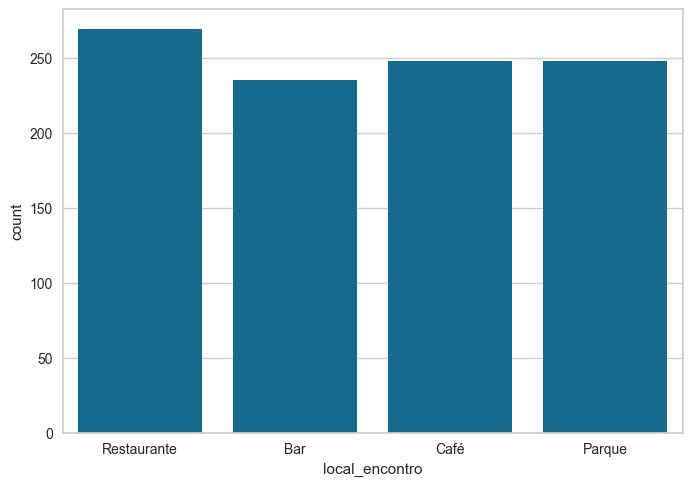

In [100]:
sns.countplot(x= base['local_encontro'])

<Axes: xlabel='momento_da_vida', ylabel='count'>

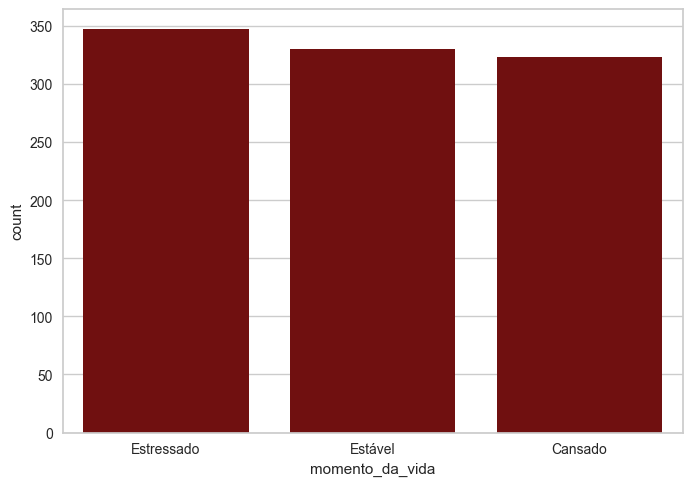

In [101]:
sns.countplot(x= base['momento_da_vida'], color='maroon')

In [102]:
x_dates = base.iloc[:, 0:8].values
y_dates = base.iloc[:, 8].values

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_features = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [6,7])], 
    remainder='passthrough')


In [104]:
x_dates = onehotencoder_features.fit_transform(x_dates)

In [105]:
x_dates.shape, y_dates.shape

((1000, 13), (1000,))

In [106]:
from sklearn.preprocessing import StandardScaler
scaler_dates = StandardScaler()
x_dates = scaler_dates.fit_transform(x_dates)

In [107]:
from sklearn.model_selection import train_test_split

x_dates_train, x_dates_test, y_dates_train, y_dates_test = train_test_split(x_dates, y_dates, test_size=0.2, random_state=0)
x_dates_train.shape, x_dates_test.shape

((800, 13), (200, 13))

In [108]:
y_dates_train.shape, y_dates_test.shape

((800,), (200,))

In [109]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(x_dates_train, y_dates_train)

SVC(kernel='linear')

In [110]:
x_dates_test

array([[-0.55424682,  1.74133801, -0.57427105, ...,  1.26674323,
        -0.9729692 ,  0.59283263],
       [-0.55424682, -0.57427105, -0.57427105, ..., -1.23732049,
         1.60766596, -1.3174766 ],
       [-0.55424682, -0.57427105, -0.57427105, ..., -0.92431252,
         0.70095631,  0.9112175 ],
       ...,
       [-0.55424682,  1.74133801, -0.57427105, ...,  0.01471137,
        -0.48474093,  1.22960237],
       [ 1.8042503 , -0.57427105, -0.57427105, ..., -0.29829659,
        -0.76372851, -1.3174766 ],
       [-0.55424682, -0.57427105, -0.57427105, ..., -0.92431252,
        -1.25195679, -0.99909173]], shape=(200, 13))

In [111]:
previsoes = svm.predict(x_dates_test)
previsoes

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [112]:
y_dates_test

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [113]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_dates_test, previsoes)

0.995

0.995

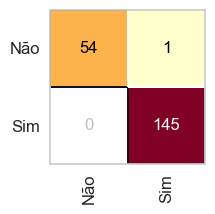

In [114]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_dates_train, y_dates_train)
cm.score(x_dates_test, y_dates_test)

In [115]:
kernels=['linear', 'rbf', 'sigmoid', 'poly']
Cs = [0.1, 1, 2, 10]
best_score = 0
best_kernel = None
best_C = 0

for i in kernels:
    for j in Cs:
        svm = SVC(kernel= i , C= j)
        svm.fit(x_dates_train, y_dates_train)
        previsoes = svm.predict(x_dates_test)
        score = accuracy_score(y_dates_test, previsoes)
        
        if score > best_score:
            best_score = score
            best_kernel = i
            best_C = j

print(f"\nBest score: {best_score}")
print(f"\nBest kernel: {best_kernel}")
print(f"\nBest C: {best_C}")


Best score: 0.995

Best kernel: linear

Best C: 1


In [116]:
def inputs(base):
    dados = {}

    for column in base.columns:
        resposta = input(f"{column}: ")
        dados[column] = resposta

    input_df = pd.DataFrame([dados])
    return input_df

In [117]:
base_inputs = inputs(base)

In [118]:
base_inputs

tempo_conversa_min risadas pontos_comuns nivel_timidez mensagens_antes  \
0                130      20             6             4              35   

  iniciativa_conversa local_encontro momento_da_vida segundo_encontro  
0                   4           Café      Estressado

In [119]:
x_inputs = base_inputs.iloc[:, 0:8].values
y_inputs = base_inputs.iloc[:, 8].values

In [120]:
x_inputs

array([['130', '20', '6', '4', '35', '4', 'Café', 'Estressado']],
      dtype=object)

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_features = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [6,7])], 
    remainder='passthrough')

In [122]:
x_inputs = onehotencoder_features.fit_transform(x_inputs)

In [123]:
x_inputs.shape, y_inputs.shape

((1, 8), (1,))

In [125]:
from sklearn.preprocessing import StandardScaler
scaler_dates = StandardScaler()
x_inputs = scaler_dates.fit_transform(x_inputs)

In [126]:
x_inputs

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# previsoes = svm.predict(x_inputs)
# previsoes

ValueError: X has 8 features, but SVC is expecting 13 features as input.